In [1]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
stop_words = stopwords.words('english')

In [3]:
columns = ["polarity", "tweet_id", "date", "query", "user_id", "tweet" ]
data = pd.read_csv("data/training.1600000.processed.noemoticon.csv", \
                   header=None, names=columns , encoding="ISO-8859-1")

In [4]:
data.head()

,polarity,tweet_id,date,query,user_id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# shuffle data for train validation test split 
data = data.sample(frac=1).reset_index(drop=True)
data.shape

(1600000, 6)

In [6]:
train, test_val = train_test_split(data, test_size=0.20, random_state=42)
del data

In [7]:
test, val = train_test_split(test_val, test_size=0.50, random_state=42)
del test_val

In [8]:
train.shape, test.shape, val.shape

((1280000, 6), (160000, 6), (160000, 6))

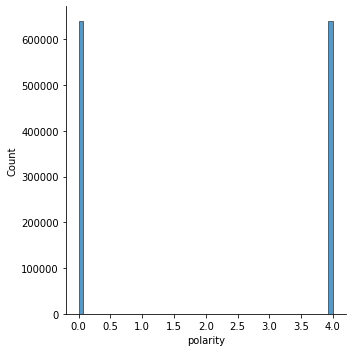

In [9]:
sns.displot(train["polarity"])

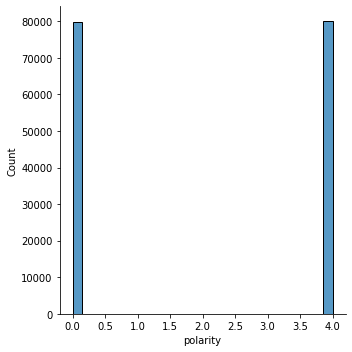

In [10]:
sns.displot(test["polarity"])

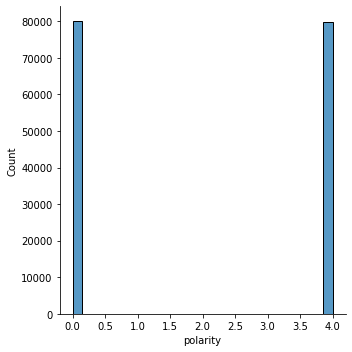

In [11]:
sns.displot(val["polarity"])

# Note: 
This is very simple model I am not going to any crazy feature engineering. Only thing I am going to do is tfidf the tokens to features and train a simple model

In [12]:
def preprocess(sentence, stop_words=stop_words):
    sentence=str(sentence)
    sentence = sentence.lower()
    # remove non numeric and other tokens
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    return " ".join(filtered_words)

In [13]:
train.head(5)

,polarity,tweet_id,date,query,user_id,tweet
1374558,4,1833791743,Mon May 18 00:28:33 PDT 2009,NO_QUERY,ConsBarcebal,"Second, I was sick yesterday so I took my rest."
1389115,4,2183915354,Mon Jun 15 15:09:37 PDT 2009,NO_QUERY,tweeteradder2,@ruru777 Get 100 followers a day using www.twe...
1137831,4,1824842676,Sun May 17 03:10:55 PDT 2009,NO_QUERY,CycleHaiku,Senryu: Saddle soaked with rain. Looks like I...
790714,0,2195383368,Tue Jun 16 11:03:26 PDT 2009,NO_QUERY,immature,@purityring check obnoxious and sign on in li...
1117911,4,2068332361,Sun Jun 07 13:54:13 PDT 2009,NO_QUERY,mrceder,@juliablue Hahaha...umm thanks. My tweets shou...


In [14]:
train["tweet_tokens"] = train["tweet"].apply(preprocess)

In [15]:
train.head()

,polarity,tweet_id,date,query,user_id,tweet,tweet_tokens
1374558,4,1833791743,Mon May 18 00:28:33 PDT 2009,NO_QUERY,ConsBarcebal,"Second, I was sick yesterday so I took my rest.",second sick yesterday took rest
1389115,4,2183915354,Mon Jun 15 15:09:37 PDT 2009,NO_QUERY,tweeteradder2,@ruru777 Get 100 followers a day using www.twe...,ruru777 get 100 followers day using www tweete...
1137831,4,1824842676,Sun May 17 03:10:55 PDT 2009,NO_QUERY,CycleHaiku,Senryu: Saddle soaked with rain. Looks like I...,senryu saddle soaked rain looks like wet glamo...
790714,0,2195383368,Tue Jun 16 11:03:26 PDT 2009,NO_QUERY,immature,@purityring check obnoxious and sign on in li...,purityring check obnoxious sign like hours cau...
1117911,4,2068332361,Sun Jun 07 13:54:13 PDT 2009,NO_QUERY,mrceder,@juliablue Hahaha...umm thanks. My tweets shou...,juliablue hahaha umm thanks tweets could reali...


In [16]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, max_features=25000, norm="l2")
train_X = vectorizer.fit_transform(train["tweet_tokens"])


In [17]:
train_Y = train["polarity"]

In [18]:
val["tweet_tokens"] = val["tweet"].apply(preprocess)
val_X = vectorizer.transform(val["tweet_tokens"])
val_Y = val["polarity"]

In [19]:
test["tweet_tokens"] = test["tweet"].apply(preprocess)
test_X = vectorizer.transform(test["tweet_tokens"])
test_Y = test["polarity"]

In [20]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(train_X, train_Y)

In [21]:
clf.score(train_X, train_Y), clf.score(val_X, val_Y)

(0.78231796875, 0.77355)

In [22]:
clf.score(test_X, test_Y)

0.77065625

In [23]:
train_X.shape

(1280000, 25000)